In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:

df = pd.read_csv('English_dataset//Gungor_2018_VictorianAuthorAttribution_data-train.csv', encoding = "ISO-8859-1")
df['author'] = df['author'] -1

In [4]:
df.head()

,text,author
0,ou have time to listen i will give you the ent...,0
1,wish for solitude he was twenty years of age a...,0
2,and the skirt blew in perfect freedom about th...,0
3,of san and the rows of shops opposite impresse...,0
4,an hour s walk was as tiresome as three in a s...,0


In [24]:
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize

# ps = PorterStemmer()
# df['text'] = df['text'].str.split(' ')
# df['text']= df['text'].apply(lambda x:[ps.stem(y) for y in x] )
# df.head()

In [25]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# df['lemmatized'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word,pos='v') for word in x])

# df['text'] = [' '.join(map(str, l)) for l in df['lemmatized']]

In [5]:
import re
df['text']= df['text'].apply(lambda x: x.lower())
df['text']= df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))


In [6]:
df.head()

,text,author
0,ou have time to listen i will give you the ent...,0
1,wish for solitude he was twenty years of age a...,0
2,and the skirt blew in perfect freedom about th...,0
3,of san and the rows of shops opposite impresse...,0
4,an hour s walk was as tiresome as three in a s...,0


In [7]:
X = df['text']
Y = df['author']


In [8]:
MAX_FEATURES = 9807

In [9]:
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer(analyzer='word',stop_words=stopwords.words('english'),max_features=MAX_FEATURES)
X = vectorizer.fit_transform(X).toarray()
Y= Y.to_numpy()

In [10]:
print(f"Shape of X: {X.shape}")

Shape of X: (53678, 9807)


In [11]:
features = vectorizer.get_feature_names_out()
df_post_processing = pd.DataFrame(X,columns=features).head()
df_post_processing.head()

,aa,aad,ab,abandon,abandoned,abashed,abbey,abide,abiding,abilities,...,young,younger,youngest,youth,youthful,youths,youve,zeal,zealous,zest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061786,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.079130,0.0,0.0,0.036152,0.0,0.065186,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087735,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021153,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019981,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
X = np.array(X,dtype=np.float32)
Y = np.array(Y,dtype=np.float32).reshape(-1,1)
X.shape , Y.shape

((53678, 9807), (53678, 1))

In [14]:
# from sklearn.preprocessing import OneHotEncoder
# le = OneHotEncoder() 
# Y = le.fit_transform(Y)
# Y = Y.toarray()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
Y = le.fit_transform(Y)

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
import numpy as np  

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio,)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


x_train =x_train.reshape(-1,MAX_FEATURES,1)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40258, 9807, 1) (8052, 9807) (5368, 9807)
(40258,) (8052,) (5368,)


In [16]:
BATCH_SIZE = 32
NUM_CLASSES = 45


In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
torch.manual_seed(0)
import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ModuleNotFoundError: No module named 'torchvision'

In [40]:
train_dl = torch.utils.data.DataLoader(dataset= list(zip(x_train,y_train)), shuffle=True, batch_size=BATCH_SIZE)
val_dl = torch.utils.data.DataLoader(dataset= list(zip(x_val,y_val)), shuffle=True, batch_size=BATCH_SIZE)
test_dl = torch.utils.data.DataLoader(dataset= list(zip(x_test,y_test)), shuffle=True, batch_size=BATCH_SIZE)

In [42]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(MAX_FEATURES,1024) 
        self.fc2 = nn.Linear(1024,64)
        self.fc3 = nn.Linear(64,NUM_CLASSES)

    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.0001,weight_decay=1e-5)
# optim = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9,nesterov=True)

num_epochs = 20

epochs= tqdm.tqdm(range(num_epochs))
n_total_steps = len(train_dl)

trainingEpoch_loss = []
validationEpoch_loss = []
train_acc_history = []
val_acc_history = []

for epoch in epochs:
    train_loss = []
    model.train()

    n_correct = 0
    n_samples = 0
    for i,batch in enumerate(train_dl):
        
        input = batch[0].reshape(-1, MAX_FEATURES).to(device)
        label= batch[1].to(device)
        # Forward-pass
        output = model(input)
        loss = criterion(output,label)
        
        # Backward-pass and optimize
        optim.zero_grad()
        loss.backward()
        optim.step()
        train_loss.append(loss.item())

        _, pred = torch.max(output,1)
        n_samples += label.shape[0]
        n_correct += (pred == label).sum().item()

    train_acc= 100.0 * n_correct / n_samples
    train_acc_history.append(train_acc)
    loss_now = np.mean(train_loss)
    trainingEpoch_loss.append(loss_now)
    model.eval()     # Optional when not using Model Specific layer

    n_correct = 0
    n_samples = 0
    for i, batch in enumerate(val_dl):
        validationStep_loss = []
        input = batch[0].reshape(-1, MAX_FEATURES).to(device)    
        label= batch[1].to(device)
        # Forward Pass
        outputs = model(input)
        # Find the Loss
        validation_loss = criterion(outputs, label)
        # Calculate Loss
        validationStep_loss.append(validation_loss.item())

        _, pred = torch.max(outputs,1)
        n_samples += label.shape[0]
        n_correct += (pred == label).sum().item()

    val_acc= 100.0 * n_correct / n_samples
    val_acc_history.append(val_acc)
    validationEpoch_loss.append(np.array(validationStep_loss).mean())
    epochs.set_postfix({"loss": loss.item(), "val_loss": validation_loss.item(),"train_acc": train_acc,"val_acc": val_acc})
    print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/ {n_total_steps}, loss = {loss.item():.4f}, val_loss = {validation_loss.item():.4f}')


  5%|▌         | 1/20 [00:14<04:37, 14.62s/it, loss=3.22, val_loss=2.36, train_acc=29.2, val_acc=52.2]

epoch 1 / 20, step 252/ 1259, loss = 3.2212, val_loss = 2.3644


 10%|█         | 2/20 [00:24<03:37, 12.07s/it, loss=1.12, val_loss=1.39, train_acc=57.1, val_acc=74.7]

epoch 2 / 20, step 252/ 1259, loss = 1.1192, val_loss = 1.3893


 15%|█▌        | 3/20 [00:35<03:11, 11.28s/it, loss=0.111, val_loss=0.919, train_acc=72.1, val_acc=85.1]

epoch 3 / 20, step 252/ 1259, loss = 0.1111, val_loss = 0.9194


 20%|██        | 4/20 [00:45<02:54, 10.89s/it, loss=0.759, val_loss=0.267, train_acc=80.2, val_acc=89.3]

epoch 4 / 20, step 252/ 1259, loss = 0.7585, val_loss = 0.2668


 25%|██▌       | 5/20 [00:55<02:40, 10.69s/it, loss=0.211, val_loss=0.936, train_acc=85.2, val_acc=91.2]

epoch 5 / 20, step 252/ 1259, loss = 0.2109, val_loss = 0.9365


 30%|███       | 6/20 [01:06<02:27, 10.57s/it, loss=0.521, val_loss=0.331, train_acc=88.4, val_acc=92.8]

epoch 6 / 20, step 252/ 1259, loss = 0.5208, val_loss = 0.3314


 35%|███▌      | 7/20 [01:16<02:16, 10.49s/it, loss=1.03, val_loss=0.376, train_acc=90.9, val_acc=93.7] 

epoch 7 / 20, step 252/ 1259, loss = 1.0337, val_loss = 0.3762


 40%|████      | 8/20 [01:26<02:05, 10.43s/it, loss=0.678, val_loss=0.213, train_acc=93, val_acc=94.3] 

epoch 8 / 20, step 252/ 1259, loss = 0.6776, val_loss = 0.2129


 45%|████▌     | 9/20 [01:37<01:54, 10.40s/it, loss=0.355, val_loss=0.294, train_acc=94.3, val_acc=94.7]

epoch 9 / 20, step 252/ 1259, loss = 0.3546, val_loss = 0.2935


 50%|█████     | 10/20 [01:47<01:43, 10.37s/it, loss=0.00245, val_loss=0.12, train_acc=95.3, val_acc=95]

epoch 10 / 20, step 252/ 1259, loss = 0.0024, val_loss = 0.1202


 55%|█████▌    | 11/20 [01:57<01:33, 10.36s/it, loss=0.0166, val_loss=0.0653, train_acc=96, val_acc=95.2]

epoch 11 / 20, step 252/ 1259, loss = 0.0166, val_loss = 0.0653


 60%|██████    | 12/20 [02:08<01:22, 10.34s/it, loss=0.045, val_loss=0.234, train_acc=96.7, val_acc=95.4]

epoch 12 / 20, step 252/ 1259, loss = 0.0450, val_loss = 0.2336


 65%|██████▌   | 13/20 [02:18<01:12, 10.34s/it, loss=0.00252, val_loss=0.21, train_acc=97.1, val_acc=95.6]

epoch 13 / 20, step 252/ 1259, loss = 0.0025, val_loss = 0.2099


 70%|███████   | 14/20 [02:28<01:02, 10.34s/it, loss=0.000304, val_loss=0.456, train_acc=97.6, val_acc=95.5]

epoch 14 / 20, step 252/ 1259, loss = 0.0003, val_loss = 0.4564


 75%|███████▌  | 15/20 [02:39<00:51, 10.34s/it, loss=0.0603, val_loss=0.00772, train_acc=97.9, val_acc=95.6]

epoch 15 / 20, step 252/ 1259, loss = 0.0603, val_loss = 0.0077


 80%|████████  | 16/20 [02:49<00:41, 10.34s/it, loss=0.052, val_loss=0.259, train_acc=98.1, val_acc=95.8]   

epoch 16 / 20, step 252/ 1259, loss = 0.0520, val_loss = 0.2590


 85%|████████▌ | 17/20 [02:59<00:31, 10.37s/it, loss=0.000659, val_loss=0.151, train_acc=98.3, val_acc=95.7]

epoch 17 / 20, step 252/ 1259, loss = 0.0007, val_loss = 0.1506


 90%|█████████ | 18/20 [03:10<00:20, 10.36s/it, loss=0.432, val_loss=0.367, train_acc=98.4, val_acc=95.6]   

epoch 18 / 20, step 252/ 1259, loss = 0.4324, val_loss = 0.3673


 95%|█████████▌| 19/20 [03:20<00:10, 10.35s/it, loss=0.00331, val_loss=0.1, train_acc=98.5, val_acc=95.9]

epoch 19 / 20, step 252/ 1259, loss = 0.0033, val_loss = 0.1004


100%|██████████| 20/20 [03:30<00:00, 10.55s/it, loss=5.27e-5, val_loss=0.104, train_acc=98.7, val_acc=95.8]

epoch 20 / 20, step 252/ 1259, loss = 0.0001, val_loss = 0.1042


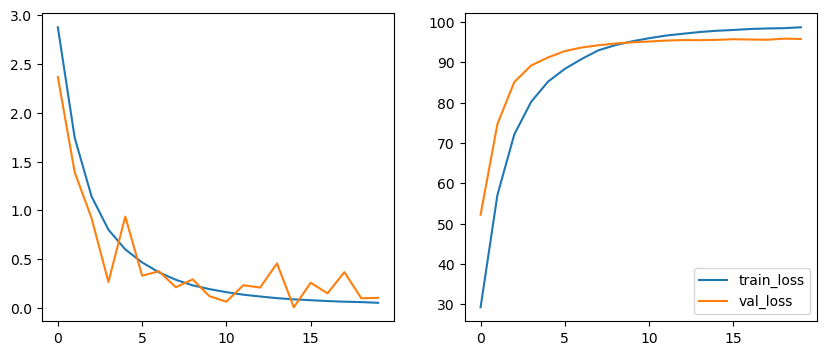

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(trainingEpoch_loss, label='train_loss')
plt.plot(validationEpoch_loss,label='val_loss')

plt.subplot(1,2,2)
plt.plot(train_acc_history, label='train_loss')
plt.plot(val_acc_history,label='val_loss')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

x_test = torch.Tensor(x_test).to(device)
outputs = model(x_test)
_, pred = torch.max(outputs,1)
pred = pred.to('cpu')
mat= confusion_matrix(y_test,pred)


<Axes: >

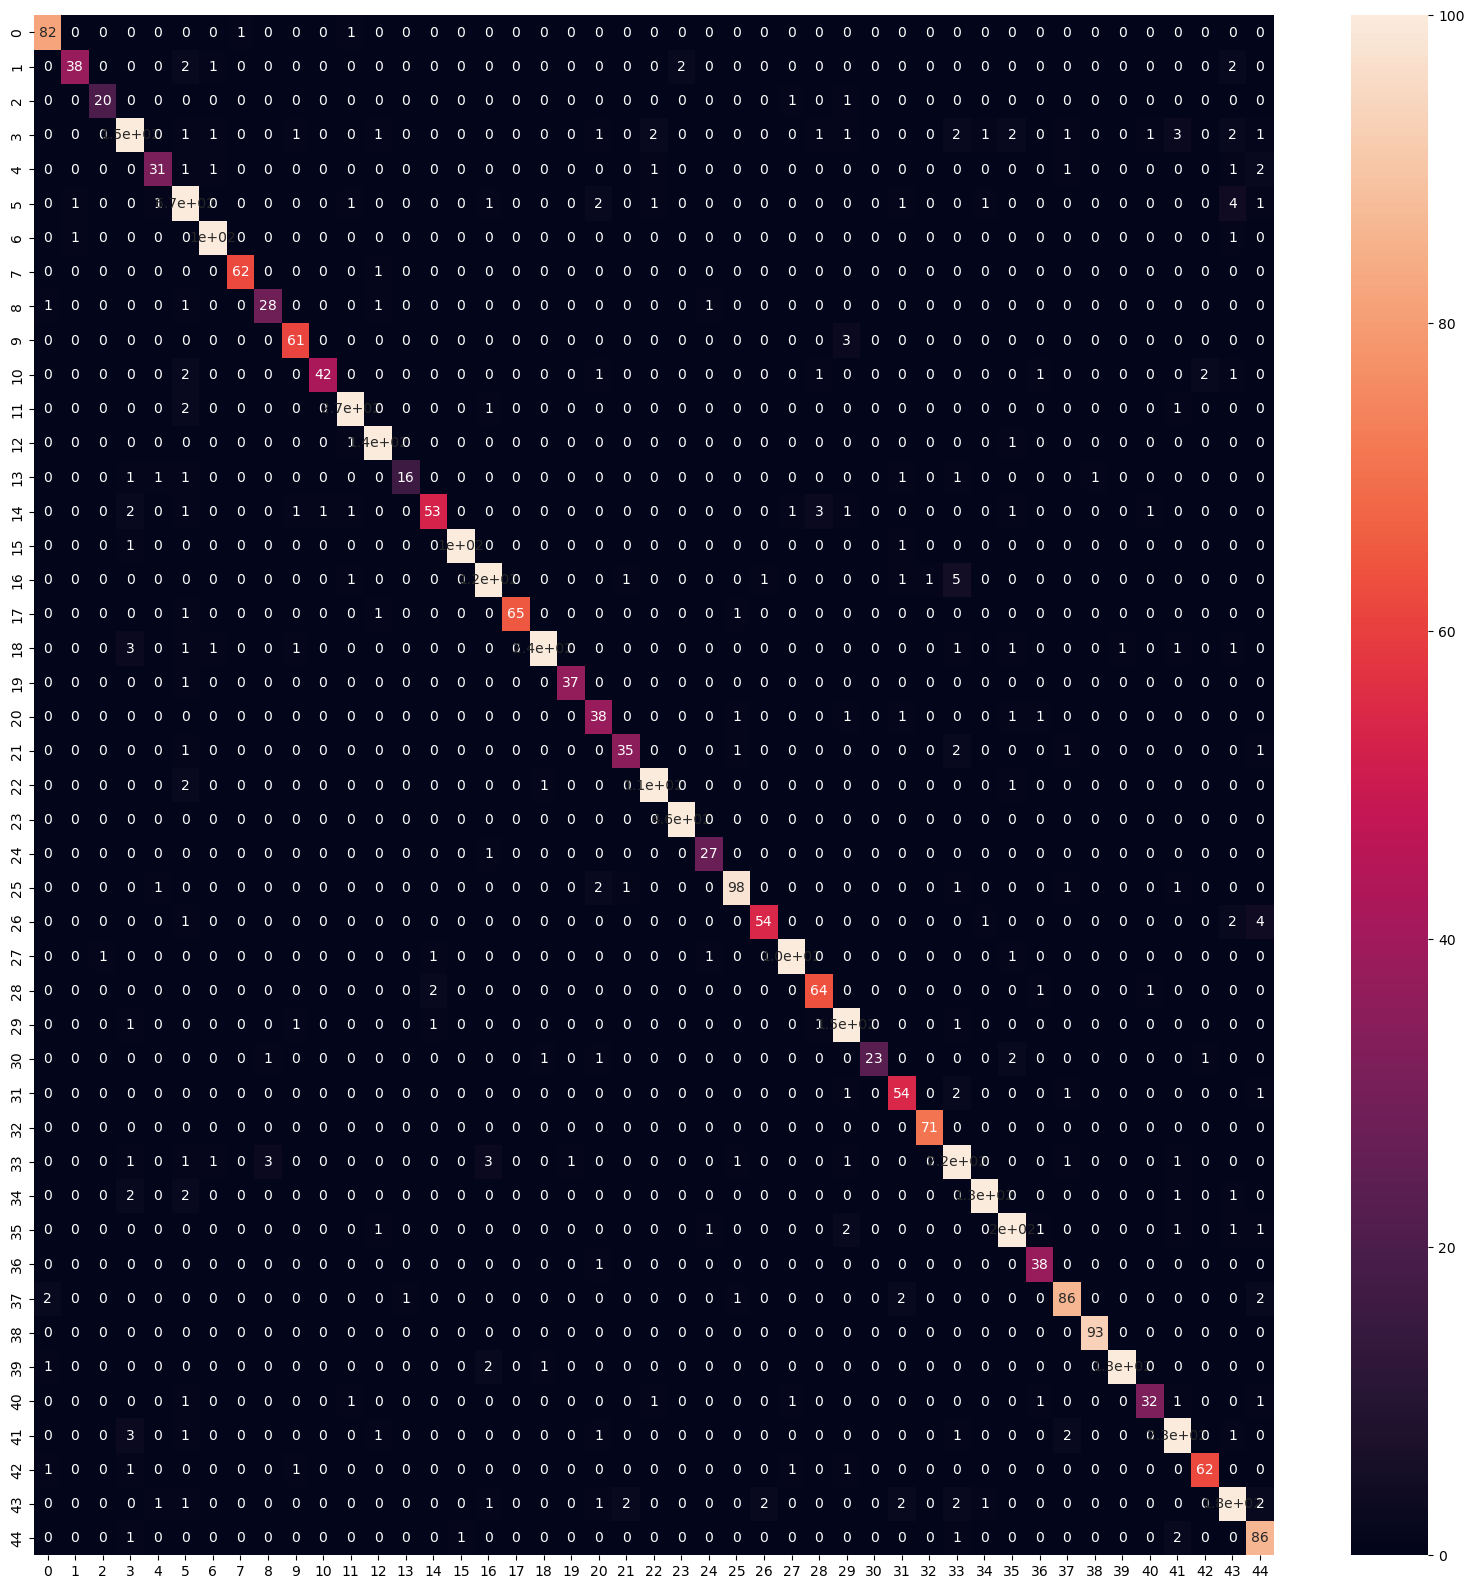

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(mat, annot= True,vmax=100)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.95      0.84      0.89        45
           2       0.95      0.91      0.93        22
           3       0.90      0.87      0.88       168
           4       0.89      0.82      0.85        38
           5       0.97      0.98      0.97       685
           6       0.95      0.98      0.97       106
           7       0.98      0.98      0.98        63
           8       0.88      0.88      0.88        32
           9       0.92      0.95      0.94        64
          10       0.98      0.84      0.90        50
          11       0.98      0.99      0.98       273
          12       0.96      0.99      0.97       146
          13       0.94      0.73      0.82        22
          14       0.93      0.80      0.86        66
          15       0.99      0.98      0.99       104
          16       0.93      0.93      0.93       135
          17       1.00    

In [ ]:
import numpy as np  

x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=11)

x_train.shape, y_train.shape

((42942, 6018), (42942,))

In [ ]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
pred = nb.predict(x_test)
print(f"Accuracy of the model: {accuracy_score(y_test,pred)}")
print(classification_report(y_test,pred))

Accuracy of the model: 0.8692250372578242
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       180
           1       0.92      0.58      0.72        84
           2       1.00      0.42      0.59        36
           3       0.84      0.70      0.76       316
           4       0.98      0.60      0.74        85
           5       0.87      0.91      0.88      1431
           6       0.92      0.94      0.93       231
           7       0.99      0.81      0.89       151
           8       0.68      0.61      0.64        99
           9       0.96      0.90      0.93       129
          10       0.96      0.82      0.89        97
          11       0.97      0.92      0.94       541
          12       0.97      0.94      0.96       313
          13       1.00      0.60      0.75        43
          14       0.84      0.80      0.82       137
          15       0.86      0.86      0.86       234
          16       0.72      0.86      